In [1]:
import pandas as pd
import numpy as np
import pickle
import datetime

import matplotlib.pyplot as plt
from matplotlib.collections import EllipseCollection
from matplotlib.colors import ListedColormap
import seaborn as sns


In [2]:
with open('data/dataframe.pkl', 'rb') as file:
    df = pickle.load(file)

with open('data/measurement_units.pkl', 'rb') as file:
    measurement_units = pickle.load(file)


In [3]:
nrow, ncol = df.shape

print(f'{nrow=}')
print(f'{ncol=}')


nrow=39000
ncol=15


In [4]:
df.dtypes


factor
co       float64
no       float64
no2      float64
nox      float64
o3       float64
pm10     float64
pm2_5    float64
so2      float64
prs      float64
rainf    float64
rh       float64
sr       float64
tout     float64
wdr      float64
wsr      float64
dtype: object

In [5]:
df.isna().any()


factor
co       True
no       True
no2      True
nox      True
o3       True
pm10     True
pm2_5    True
so2      True
prs      True
rainf    True
rh       True
sr       True
tout     True
wdr      True
wsr      True
dtype: bool

In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
factor,,,,,,,,
co,29929.0,1.680407,1.026028,0.010,0.800,1.500,2.390,5.790
no,31698.0,9.119481,8.919118,0.500,3.200,8.200,11.000,161.000
no2,32587.0,11.030659,7.882015,0.100,5.700,8.800,14.300,82.300
nox,32603.0,19.730884,13.365144,0.500,12.300,16.900,23.300,198.200
o3,37916.0,25.394978,19.094151,1.000,10.000,22.000,35.000,153.000
pm10,36918.0,60.000271,35.893426,2.000,37.000,52.000,75.000,714.000
pm2_5,20455.0,18.930229,13.211835,2.000,9.000,16.000,25.000,156.000
so2,29446.0,4.205556,2.241917,0.500,2.900,3.600,4.800,67.400
prs,38526.0,713.374157,1.658740,702.400,712.300,713.200,714.300,738.900


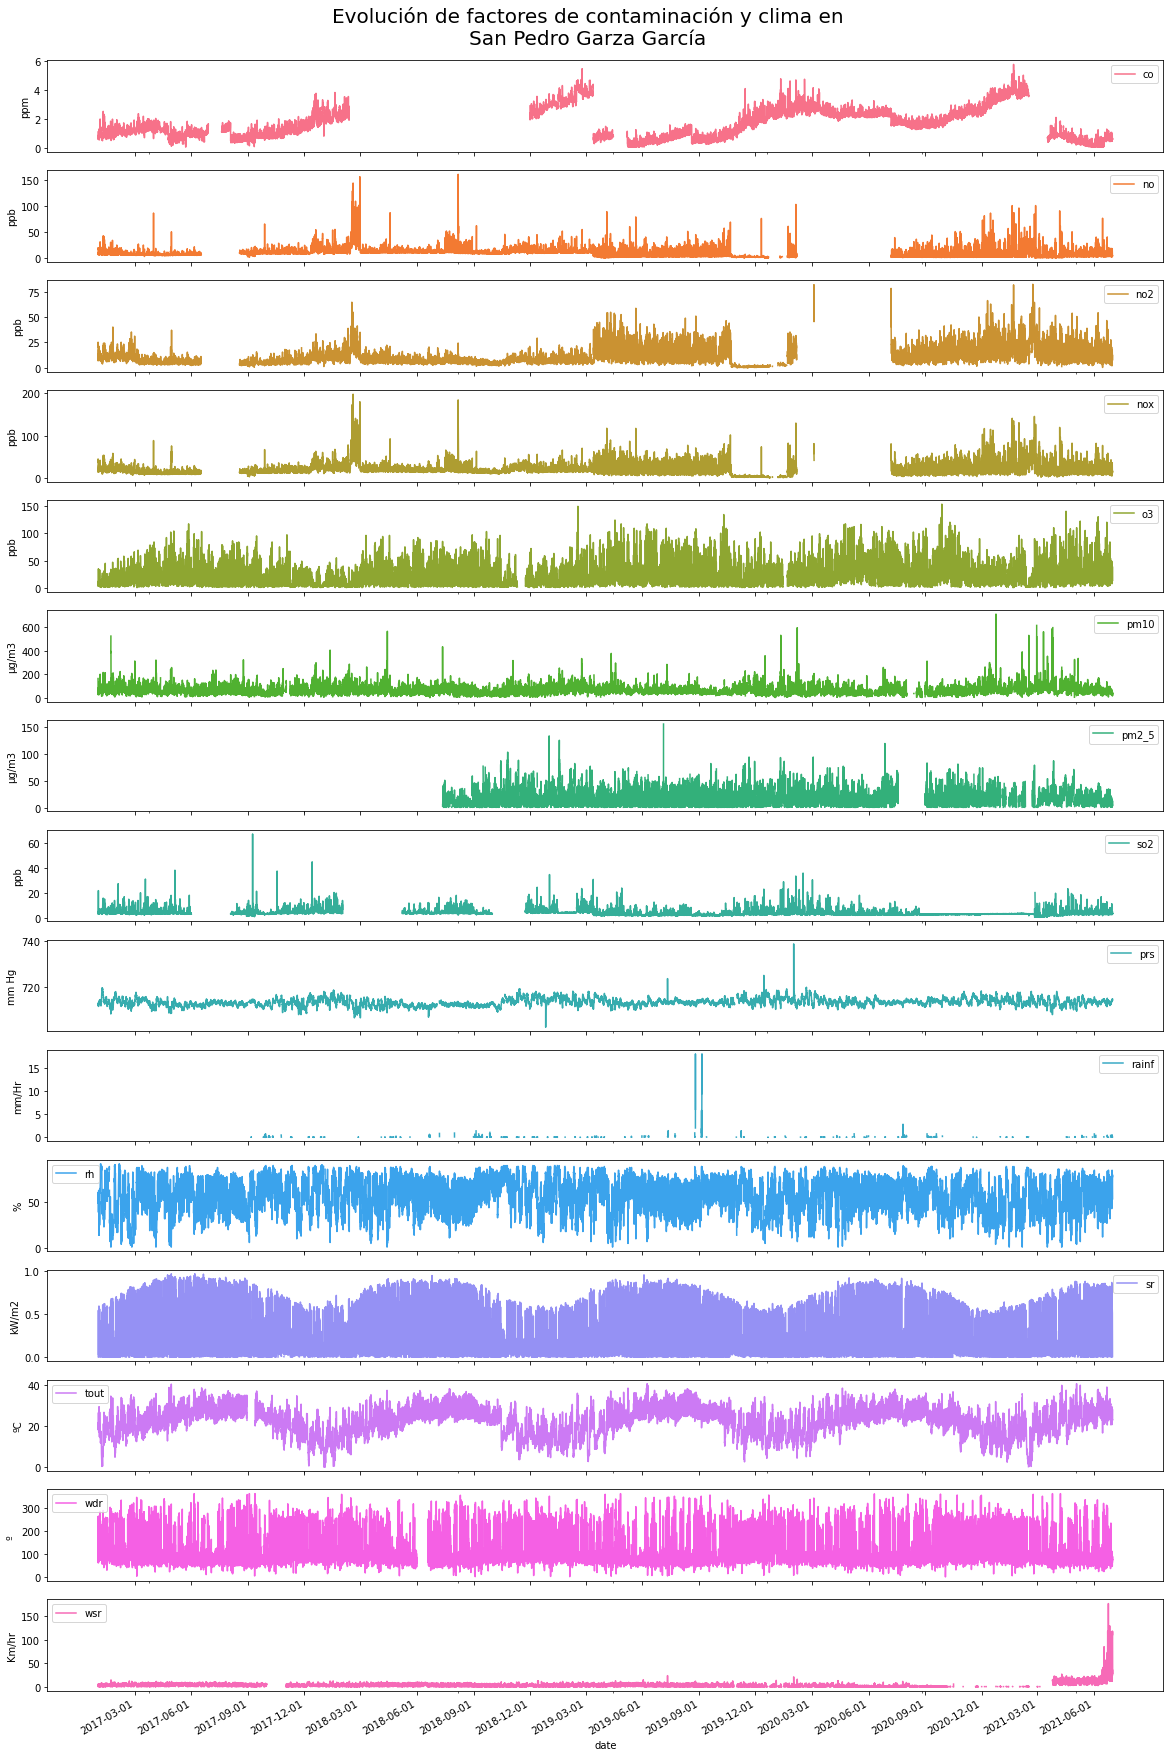

In [7]:
palette = sns.husl_palette(n_colors=15)

kwargs = {'subplots': True,
          'figsize': (20, 30),
          'sharex': True,
          'xticks': pd.date_range(df.index.min(), df.index.max(), freq='Q').strftime("%Y-%b").tolist(),
          'colormap': ListedColormap(palette.as_hex())
          }

axes = df.plot(**kwargs)

for ax in axes:
    factor = ax.get_legend().get_texts()[0]._text
    ax.set_ylabel(measurement_units[factor])

fig = axes[0].get_figure()  # All Axes contain the 15 subplots as figure
_ = fig.suptitle(
    'Evolución de factores de contaminación y clima en\nSan Pedro Garza García', fontsize=20)
fig.subplots_adjust(top=0.955)


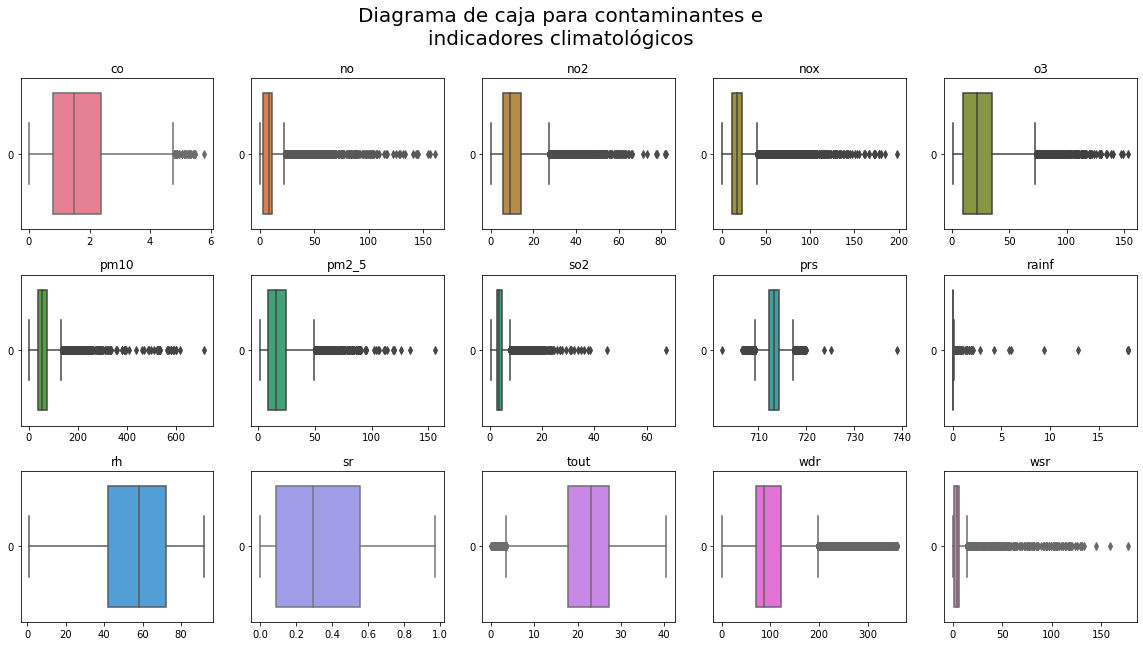

In [8]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10), gridspec_kw={'hspace': 0.3})

iter_palette = iter(palette)

for i in range(3):
    for j in range(5):
        factor = df.iloc[:, i*5 + j]
        sns.boxplot(data=factor, ax=axes[i, j],
                    orient='h', color=next(iter_palette))
        axes[i, j].set_title(factor.name)

_ = fig.suptitle(
    'Diagrama de caja para contaminantes e\nindicadores climatológicos', fontsize=20)


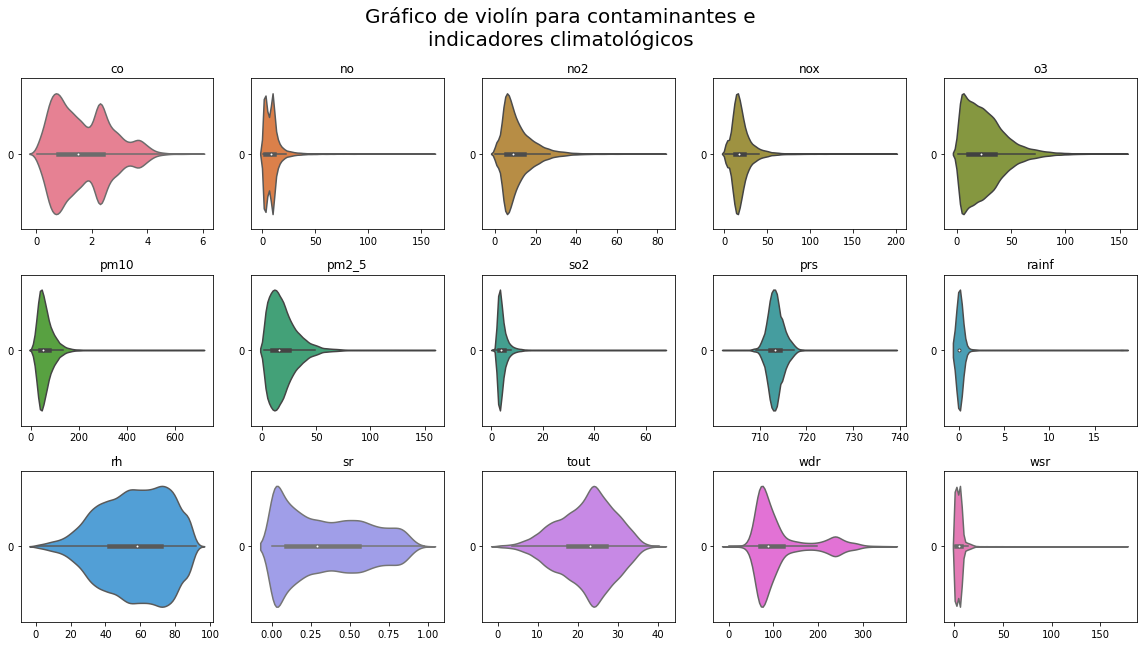

In [9]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10), gridspec_kw={'hspace': 0.3})

iter_palette = iter(palette)

for i in range(3):
    for j in range(5):
        factor = df.iloc[:, i*5 + j]
        sns.violinplot(data=factor, ax=axes[i, j], orient='h',
                       color=next(iter_palette))
        axes[i, j].set_title(factor.name)

_ = fig.suptitle(
    'Gráfico de violín para contaminantes e\nindicadores climatológicos', fontsize=20)


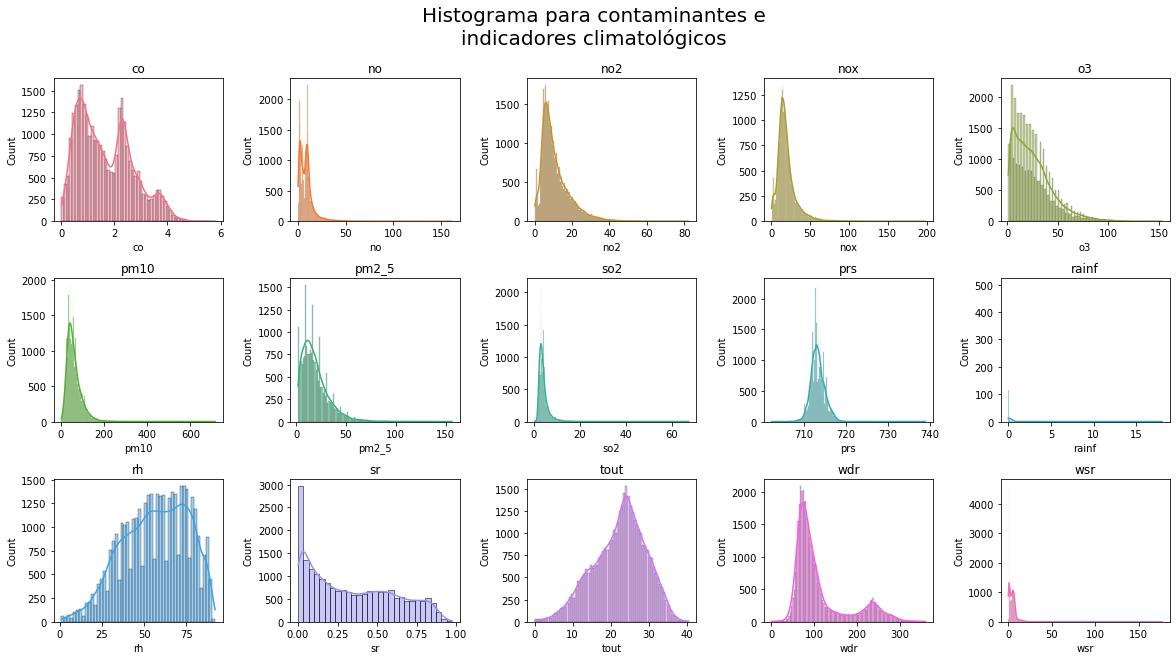

In [10]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10),
                         gridspec_kw={'hspace': 0.4, 'wspace': 0.4})

iter_palette = iter(palette)

for i in range(3):
    for j in range(5):
        factor = df.iloc[:, i*5 + j]
        sns.histplot(data=factor, ax=axes[i, j],
                     kde=True, color=next(iter_palette))
        axes[i, j].set_title(factor.name)

_ = fig.suptitle(
    'Histograma para contaminantes e\nindicadores climatológicos', fontsize=20)


In [11]:
def plot_corr_ellipses(data, ax, **kwargs):

    M = np.array(data)
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T
    w = np.ones_like(M).ravel()
    h = 1 - np.abs(M).ravel()
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec


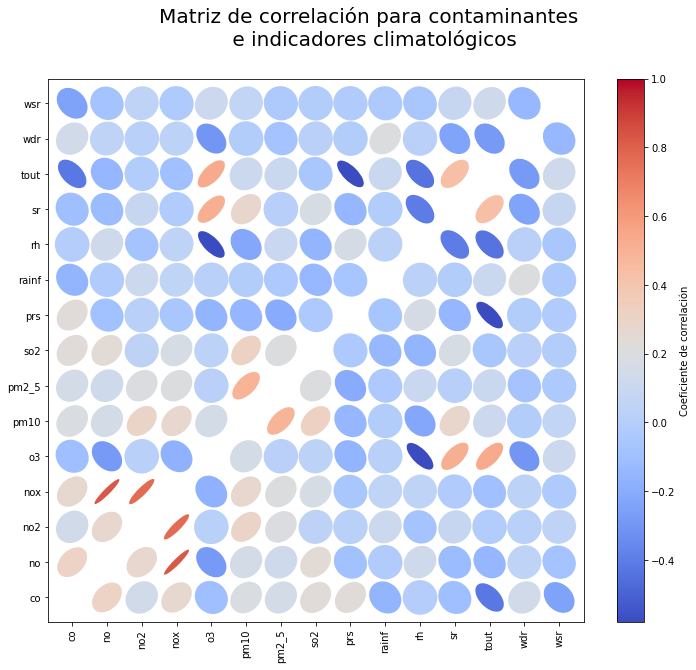

In [12]:
fig, ax = plt.subplots(figsize=(12, 10))
_ = fig.suptitle(
    'Matriz de correlación para contaminantes \n e indicadores climatológicos', fontsize=20)
m = plot_corr_ellipses(df.corr(), ax=ax, cmap='coolwarm')
cb = fig.colorbar(m)
cb.set_label('Coeficiente de correlación')
ax.margins(0.05)


In [13]:
def quartiles(series: pd.core.series.Series, bins=10):
    return (
        pd.cut(series, bins=bins)
        .value_counts()
        .sort_index()
    )


In [14]:
quartiles(df.pm10)


(1.288, 73.2]     27438
(73.2, 144.4]      8615
(144.4, 215.6]      724
(215.6, 286.8]       86
(286.8, 358.0]       23
(358.0, 429.2]        7
(429.2, 500.4]        6
(500.4, 571.6]       11
(571.6, 642.8]        7
(642.8, 714.0]        1
Name: pm10, dtype: int64

In [15]:
quartiles(df.pm2_5)


(1.846, 17.4]     11152
(17.4, 32.8]       6463
(32.8, 48.2]       2139
(48.2, 63.6]        504
(63.6, 79.0]        146
(79.0, 94.4]         35
(94.4, 109.8]         7
(109.8, 125.2]        6
(125.2, 140.6]        2
(140.6, 156.0]        1
Name: pm2_5, dtype: int64

In [16]:
quartiles(df.so2)


(0.433, 7.19]     27204
(7.19, 13.88]      2029
(13.88, 20.57]      175
(20.57, 27.26]       25
(27.26, 33.95]        7
(33.95, 40.64]        4
(40.64, 47.33]        1
(47.33, 54.02]        0
(54.02, 60.71]        0
(60.71, 67.4]         1
Name: so2, dtype: int64

In [17]:
quartiles(df.prs)


(702.363, 706.05]        1
(706.05, 709.7]        382
(709.7, 713.35]      19805
(713.35, 717.0]      17475
(717.0, 720.65]        860
(720.65, 724.3]          1
(724.3, 727.95]          1
(727.95, 731.6]          0
(731.6, 735.25]          0
(735.25, 738.9]          1
Name: prs, dtype: int64

In [18]:
quartiles(df.rainf)


(-0.00798, 1.808]    1182
(1.808, 3.606]          6
(3.606, 5.404]          1
(5.404, 7.202]          2
(7.202, 9.0]            0
(9.0, 10.798]           1
(10.798, 12.596]        0
(12.596, 14.394]        1
(14.394, 16.192]        0
(16.192, 17.99]         6
Name: rainf, dtype: int64

In [19]:
quartiles(df.wsr)


(-0.0765, 17.75]    29051
(17.75, 35.4]         297
(35.4, 53.05]          61
(53.05, 70.7]          29
(70.7, 88.35]          26
(88.35, 106.0]         21
(106.0, 123.65]        19
(123.65, 141.3]         7
(141.3, 158.95]         2
(158.95, 176.6]         1
Name: wsr, dtype: int64

`no`, `no2`, `nox` also have some severe outliers, but their distributions are really similar. These will be analyzed separately

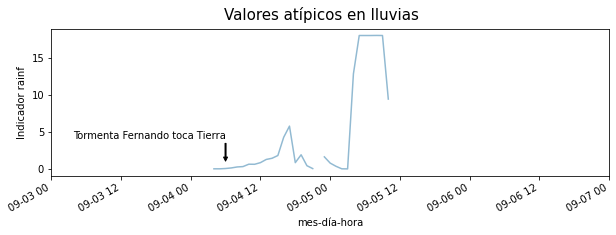

In [20]:
fig, ax = plt.subplots(figsize=(10, 3))
ax = df.rainf.plot(color='#92BAD2')

# Zoom in September 2019
_ = ax.set_xlim(['9-3-2019', '9-7-2019'])

occurence = {'date': datetime.datetime(2019, 9, 4, 6),
             'event': 'Tormenta Fernando toca Tierra'}
_ = ax.annotate(occurence['event'], xy=(occurence['date'], df.rainf.asof(occurence['date']) + 1),
                xytext=(occurence['date'],
                        df.rainf.asof(occurence['date']) + 5),
                arrowprops=dict(facecolor='black', headwidth=4, width=1,
                                headlength=4),
                horizontalalignment='right', verticalalignment='top')

_ = ax.set_xlabel('mes-día-hora')
_ = ax.set_ylabel('Indicador rainf')
_ = fig.suptitle('Valores atípicos en lluvias', fontsize=15)


Se confirma que se trata de un indicador de lluvias, es válido eliminar estos valores atípicos causados por la tormenta y reemplazar los valores faltantes con cero

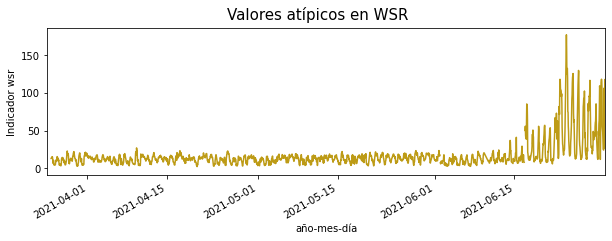

In [21]:
fig, ax = plt.subplots(figsize=(10, 3))
ax = df.wsr.plot(color='#BD9B16')

# Zoom in September 2019
_ = ax.set_xlim(['25-3-2021', df.index.max()])

_ = ax.set_xlabel('año-mes-día')
_ = ax.set_ylabel('Indicador wsr')
_ = fig.suptitle('Valores atípicos en WSR', fontsize=15)
